# Importing libraries

In [43]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px # We´ll use plotly instead of Matplotlib since its more didactic
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Load and prepare the dataset

In [45]:
data = pd.read_csv('data/raw_house_data.csv')
data.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-1.103.782,31.356.362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045.371,31.594.213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040.707,31.594.844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035.925,31.645.878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813.768,32.285.162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55


## **Check features data types**
Comparing the data with the head of before, are the features correctly represented?

In [46]:
data.dtypes

MLS                   int64
sold_price          float64
zipcode               int64
longitude            object
latitude             object
lot_acres           float64
taxes               float64
year_built            int64
bedrooms              int64
bathrooms            object
sqrt_ft              object
garage               object
kitchen_features     object
fireplaces          float64
floor_covering       object
HOA                  object
dtype: object

Make a list of the elements you think will need modification in their representation.

In the case of this exercise, we´ll ignore *`kitchen_features`* and *`floor_covering`* since they require an approach to text analysis. We´ll also delete *`MLS`* and *`HOA`* since it´s only a descriptive feature of the neighbor association of the house.

In [47]:
"""
longitude - float
latitude - float
bathrooms - float or int (ignoring half bathrooms)
sqr_ft - float or int
garage - int
fireplaces - int

MLS - remove
kitchen_features - remove
floor_coveringg - remove
HOA - remove
"""

'\nlongitude - float\nlatitude - float\nbathrooms - float or int (ignoring half bathrooms)\nsqr_ft - float or int\ngarage - int\nfireplaces - int\n\nMLS - remove\nkitchen_features - remove\nfloor_coveringg - remove\nHOA - remove\n'

## **Check for repeated and null values**
Make sure all your dataset row´s have *unique* and *not empty* information

In [48]:
#Check the size of the data
print(f"Size of dataset: {data.shape}")

#Check and delete for duplicates
print(f"Number of duplicate rows: {data[data.duplicated()].shape}\n")
data.drop_duplicates()

#Check for null values
print('Null values')
print(data.isnull().sum())

Size of dataset: (5000, 16)
Number of duplicate rows: (0, 16)

Null values
MLS                  0
sold_price           0
zipcode              0
longitude            0
latitude             0
lot_acres           10
taxes                0
year_built           0
bedrooms             0
bathrooms            0
sqrt_ft              0
garage               0
kitchen_features     0
fireplaces          25
floor_covering       0
HOA                  0
dtype: int64


## Keep useful data and modify nulls

Delete features that are not being considered, and decide what to do with the ones that have null values.

The easiest approach would be to delete those as well, but that means eliminating some rows of data that might be useful. Another approach could be also to **change those values for another one of the same context as the remaining data**.

For example, *`fireplaces`* null values can be set to a value of 0, indicating that there´s none in the house. However, in the case of *`lot_acres`*, saying that there´s 0 acres of terrain make no sense; in this case, deleting is the best scenario.



In [49]:
# Delete ignored features
ignore = ['MLS', 'kitchen_features', 'floor_covering', 'HOA']
data.drop(ignore, inplace=True, axis=1)

# Convert null values of fireplaces into 0
data['fireplaces'] = data['fireplaces'].fillna(0)

# Delete null values of lot_acres
data = data.dropna(subset=['lot_acres'])  # Indicates which column to check for null values

Everytime you delete rows, you need to reset the indexing in the dataset

In [50]:
data = data.reset_index()

"""
When reseting the index, you automatically create a new column with the previous index, called
'index'. You need to delete that column as well
"""
data.drop('index', inplace=True, axis=1)

Modify your features from the list

In [51]:
# Transform longitude and latitude into floats deleting the right-most decimal point
for i in range(len(data)):
  lon = data['longitude'][i]
  lon = lon.split('.',1) # We split by the first point
  lon[-1] = lon[-1].replace('.','') # Change the dot by nothing
  lon = float('.'.join(lon))  # Join back and transform into float

  #Repeat same process for the latitude
  lat = data['latitude'][i]
  lat = lat.split('.',1)
  lat[-1] = lat[-1].replace('.','')
  lat = '.'.join(lat)

  # Save the float values back into the dataset
  data['longitude'][i] = lon
  data['latitude'][i] = lat

# Cast into float numbers now that they have the correct format
data['longitude'] = data['longitude'].astype(float)
data['latitude'] = data['latitude'].astype(float)

<ipython-input-51-d073d638b01b>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-51-d073d638b01b>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Check the unique values of the feature to see why they are not float or numeric already

In [52]:
data['bathrooms'].unique()

array(['10', '2', '3', '5', '6', '4', '8', '7', '15', '4.5', '1', '9',
       '11', '18', '14', '3.5', 'None', '35', '2.5', '36'], dtype=object)

In this case, there´s a 'None' label. In this case, we'll remove them since it's uncommon for a house to have 0 bathrooms (you can decide on a different approach depending on your way of thinking).

In [53]:
data = data[data['bathrooms'] != 'None']
data['bathrooms'] = data['bathrooms'].astype(float)

<ipython-input-53-43975c6186ca>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Repeat for the other features

In [54]:
print(data['sqrt_ft'].unique())
print(data['garage'].unique())
print(data['fireplaces'].unique())

['10500' '7300' 'None' ... '2106' '3601' '1772']
['0' 'None' '4' '3' '5' '2' '6' '15' '8' '7' '4.5' '3.5' '2.5' '1' '9'
 '22' '30' '12' '10' '11' '20' '13']
[6. 5. 4. 1. 2. 3. 7. 0. 9. 8.]


As you can see, fireplaces is already an int feature thanks to changing the null values into 0. In this case there's nothing else to do.

In [55]:
# In pandas, multiple conditions of data need to be addressed with the & instead of 'and', and | instead of 'or'
data = data[(data['sqrt_ft'] != 'None') & (data['garage'] != 'None')]
data['sqrt_ft'] = data['sqrt_ft'].astype(float)
data['garage'] = data['garage'].astype(float)
data = data.reset_index() # Don´t forget to reset your index
data.drop('index', inplace=True, axis=1)

Now check again the data types, if you still have null values, and how many obsrvations your dataset has after these modifications.

In [56]:
#Check the size of the data
print(f"Size of dataset: {data.shape}")

#Check for null values
print('Null values')
print(data.isnull().sum())

Size of dataset: (4940, 12)
Null values
sold_price    0
zipcode       0
longitude     0
latitude      0
lot_acres     0
taxes         0
year_built    0
bedrooms      0
bathrooms     0
sqrt_ft       0
garage        0
fireplaces    0
dtype: int64


In [57]:
data.dtypes

sold_price    float64
zipcode         int64
longitude     float64
latitude      float64
lot_acres     float64
taxes         float64
year_built      int64
bedrooms        int64
bathrooms     float64
sqrt_ft       float64
garage        float64
fireplaces    float64
dtype: object

In [58]:
data.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces
0,5300000.0,85637,-1.103782,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6.0
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5.0
2,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,4.0
3,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5.0
4,3250000.0,85718,-110.910593,3.233909,1.67,27802.84,1999,3,4.0,6842.0,3.0,5.0


# **Detect and remove your outliers**
Now that you cleansed your data, you can actually start evaluating each feature individually to see if all the values share common information, or if they just give noisy, irrelevant data.

Just beware that depending on the project, you might actually want to keep those outliers for your future model to compare them from the real data. In this case, we will remove the outliers.

## **Categorical features**
These type of columns usually are used for classification purposes, indicating to which class each observation of the dataset belongs to.

Usually, it is only necessary to create a traditional histogram to see if your classes are balanced in the dataset or not. In case they aren´t, you just need to apply balancing techniques to stabilize the number of occurrences for each of them.

In this case, we have 6 categorical features: *`zipcode`*, *`year_built`*, *`bedrooms`*, *`bathrooms`*, *`garage`*, and *`fireplaces`*. We'll plot only one feature, but you are welcome to try the rest of the features as well.

In [59]:
fig = px.histogram(data, x='zipcode')
fig.show()

In this case, we can observe that we have some zipcodes with relatively a small amount of houses, unbalancing the number of classes in the dataset.

There are some models we can implement to gorup them into new categories (without deleting the outliers), which we´ll see in the following classes. Ideally, by having less, more balanced classes, our models will perform better.

The following plot will force the histogram into three classes, but this crude, direct approach is not recommended. It´s just a visualization of what we want to obtain after grouping our classes.

In [60]:
new_zipcodes = [] # We create an empty array to save the new classes
for zipcode in data['zipcode']:
  if zipcode < 85700:
    new_zipcodes.append(0)
  elif zipcode >= 85700 and zipcode < 85730:
    new_zipcodes.append(1)
  else:
    new_zipcodes.append(2)

fig = px.histogram(new_zipcodes, x=new_zipcodes)
fig.show()

## **Numerical features**
For these features, you also need to evaluate the histogram of the feature. The only difference with the categorical feature, is that in this case, you also need to measure the *skewness* and *kurtosis* values.

These metrics will determine if your feature follows a normal distribution, a.k.a. a feature easy to evaluate with an ML model. In case your data does not follow a normal distribution, there are some methods that you can use when dealing with your data.

You can find more information about that on [here](https://reinec.medium.com/my-notes-handling-skewed-data-5984de303725) and [here](https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/#:~:text=The%20skewness%20is%20a%20measure,pushed%20towards%20the%20left%20side).

For this dataset, the numerical features are: *`sold_price`*, *`lot_acres`*, *`taxes`*, and *`sqrt_ft`*. For purposes of this lesson, we´ll only evaluate one feature, but it is recommended for you to check the others as well.

In [61]:
kurtosis = data['sold_price'].kurt()
skewness = data['sold_price'].skew()
print(f"Kurtosis:{kurtosis}    Skewness:{skewness}")

fig = px.histogram(data, x='sold_price')
fig.show()

Kurtosis:24.96513335355448    Skewness:3.6662474520727746


In this case, our kurtosis and skewness show that our feature is heavily left-sided, which may show difficulties when creating our models. In this case, we have two options: remove outliers and apply a log-likelihood to try and obtain a more normal behavior of the data.

For this case, we´ll just say that all prices below 500k and above 2M will be considered as outliers. For a better way of detecting which elements to delete as outliers, see [this link](https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/).

In [62]:
# Remove the outliers
data = data[(data['sold_price'] >= 500000) & (data['sold_price'] <= 2000000)]

# Apply logarithm to feature
data['sold_price'] = np.log(data['sold_price'])

# Check the results
kurtosis = data['sold_price'].kurt()
skewness = data['sold_price'].skew()
print(f"Kurtosis:{kurtosis}    Skewness:{skewness}")

fig = px.histogram(data, x='sold_price')
fig.show()

Kurtosis:1.1320353512175751    Skewness:1.21637207793034


<ipython-input-62-708c490f5022>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## **Working with latitude and longitude**
In this case, we have geographical coordinates for the locations of the sold houses. We can use plotly to create a map that visualizes those locations and see the regions.

First, you will need to create an account on [Mapbox](https://www.mapbox.com/) to be able to plot real maps. The free version allows you to plot 50,000 maps, so that´s a good number for testing.

Once you have your account, you will copy your **default public token** in a txt file, and you'll save it on the same folder as your notebook.

In [63]:
# Load your token
my_token = open('map_token.txt').read()
px.set_mapbox_access_token(my_token)

# Make your map
map = px.scatter_mapbox(data,
                        lat="latitude",
                        lon="longitude",     
                        color="sold_price", 
                        size_max=15,
                        zoom=10)
map.show()

It seems that we have some locations out of the real zone of the houses (considering that the dataset is from Arizona households).

This means that we'll need to remove the outliers to concentrate on the specific region of the dataset. We can check the outliers with a boxplot of the coordinates.

In [64]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(
    go.Box(x = (data['latitude']),
           name = 'Latitude'),
    row = 1,
    col = 1
)
fig.add_trace(
    go.Box(x = (data['longitude']),
           name = 'Longitude'),
    row = 2,
    col = 1
)

fig.update_layout(height=500, width=800)
fig.show()

Here we can see that the real zone of the houses are around the next coordinates:


*   30 < latitude < 35
*   -112 < longitude < -109.5



In [65]:
# Keeping the coordinates from the main range
data = data[(data['longitude'] > -112) & (data['longitude'] < -109.5)]

#Delete the latitudes 31.97 < latitude < 32.7
data = data[(data['latitude'] > 30) & (data['latitude'] < 35)]

Now the boxplots and the map are much better represented

In [66]:
fig = make_subplots(rows=2, cols=1)

fig.add_trace(
    go.Box(x = (data['latitude']),
           name = 'Latitude'),
    row = 1,
    col = 1
)
fig.add_trace(
    go.Box(x = (data['longitude']),
           name = 'Longitude'),
    row = 2,
    col = 1
)

fig.update_layout(height=500, width=800)
fig.show()

In [67]:
px.set_mapbox_access_token(my_token)

# Make your map
map = px.scatter_mapbox(data,
                        lat="latitude",
                        lon="longitude",     
                        color="sold_price", 
                        size_max=15,
                        zoom=10)
map.show()

# **Find relations on the data**
Once you finished your second cleanse of data and no more outliers are detected, you can start to compare the behavior between features to see how they relate with your desired output.

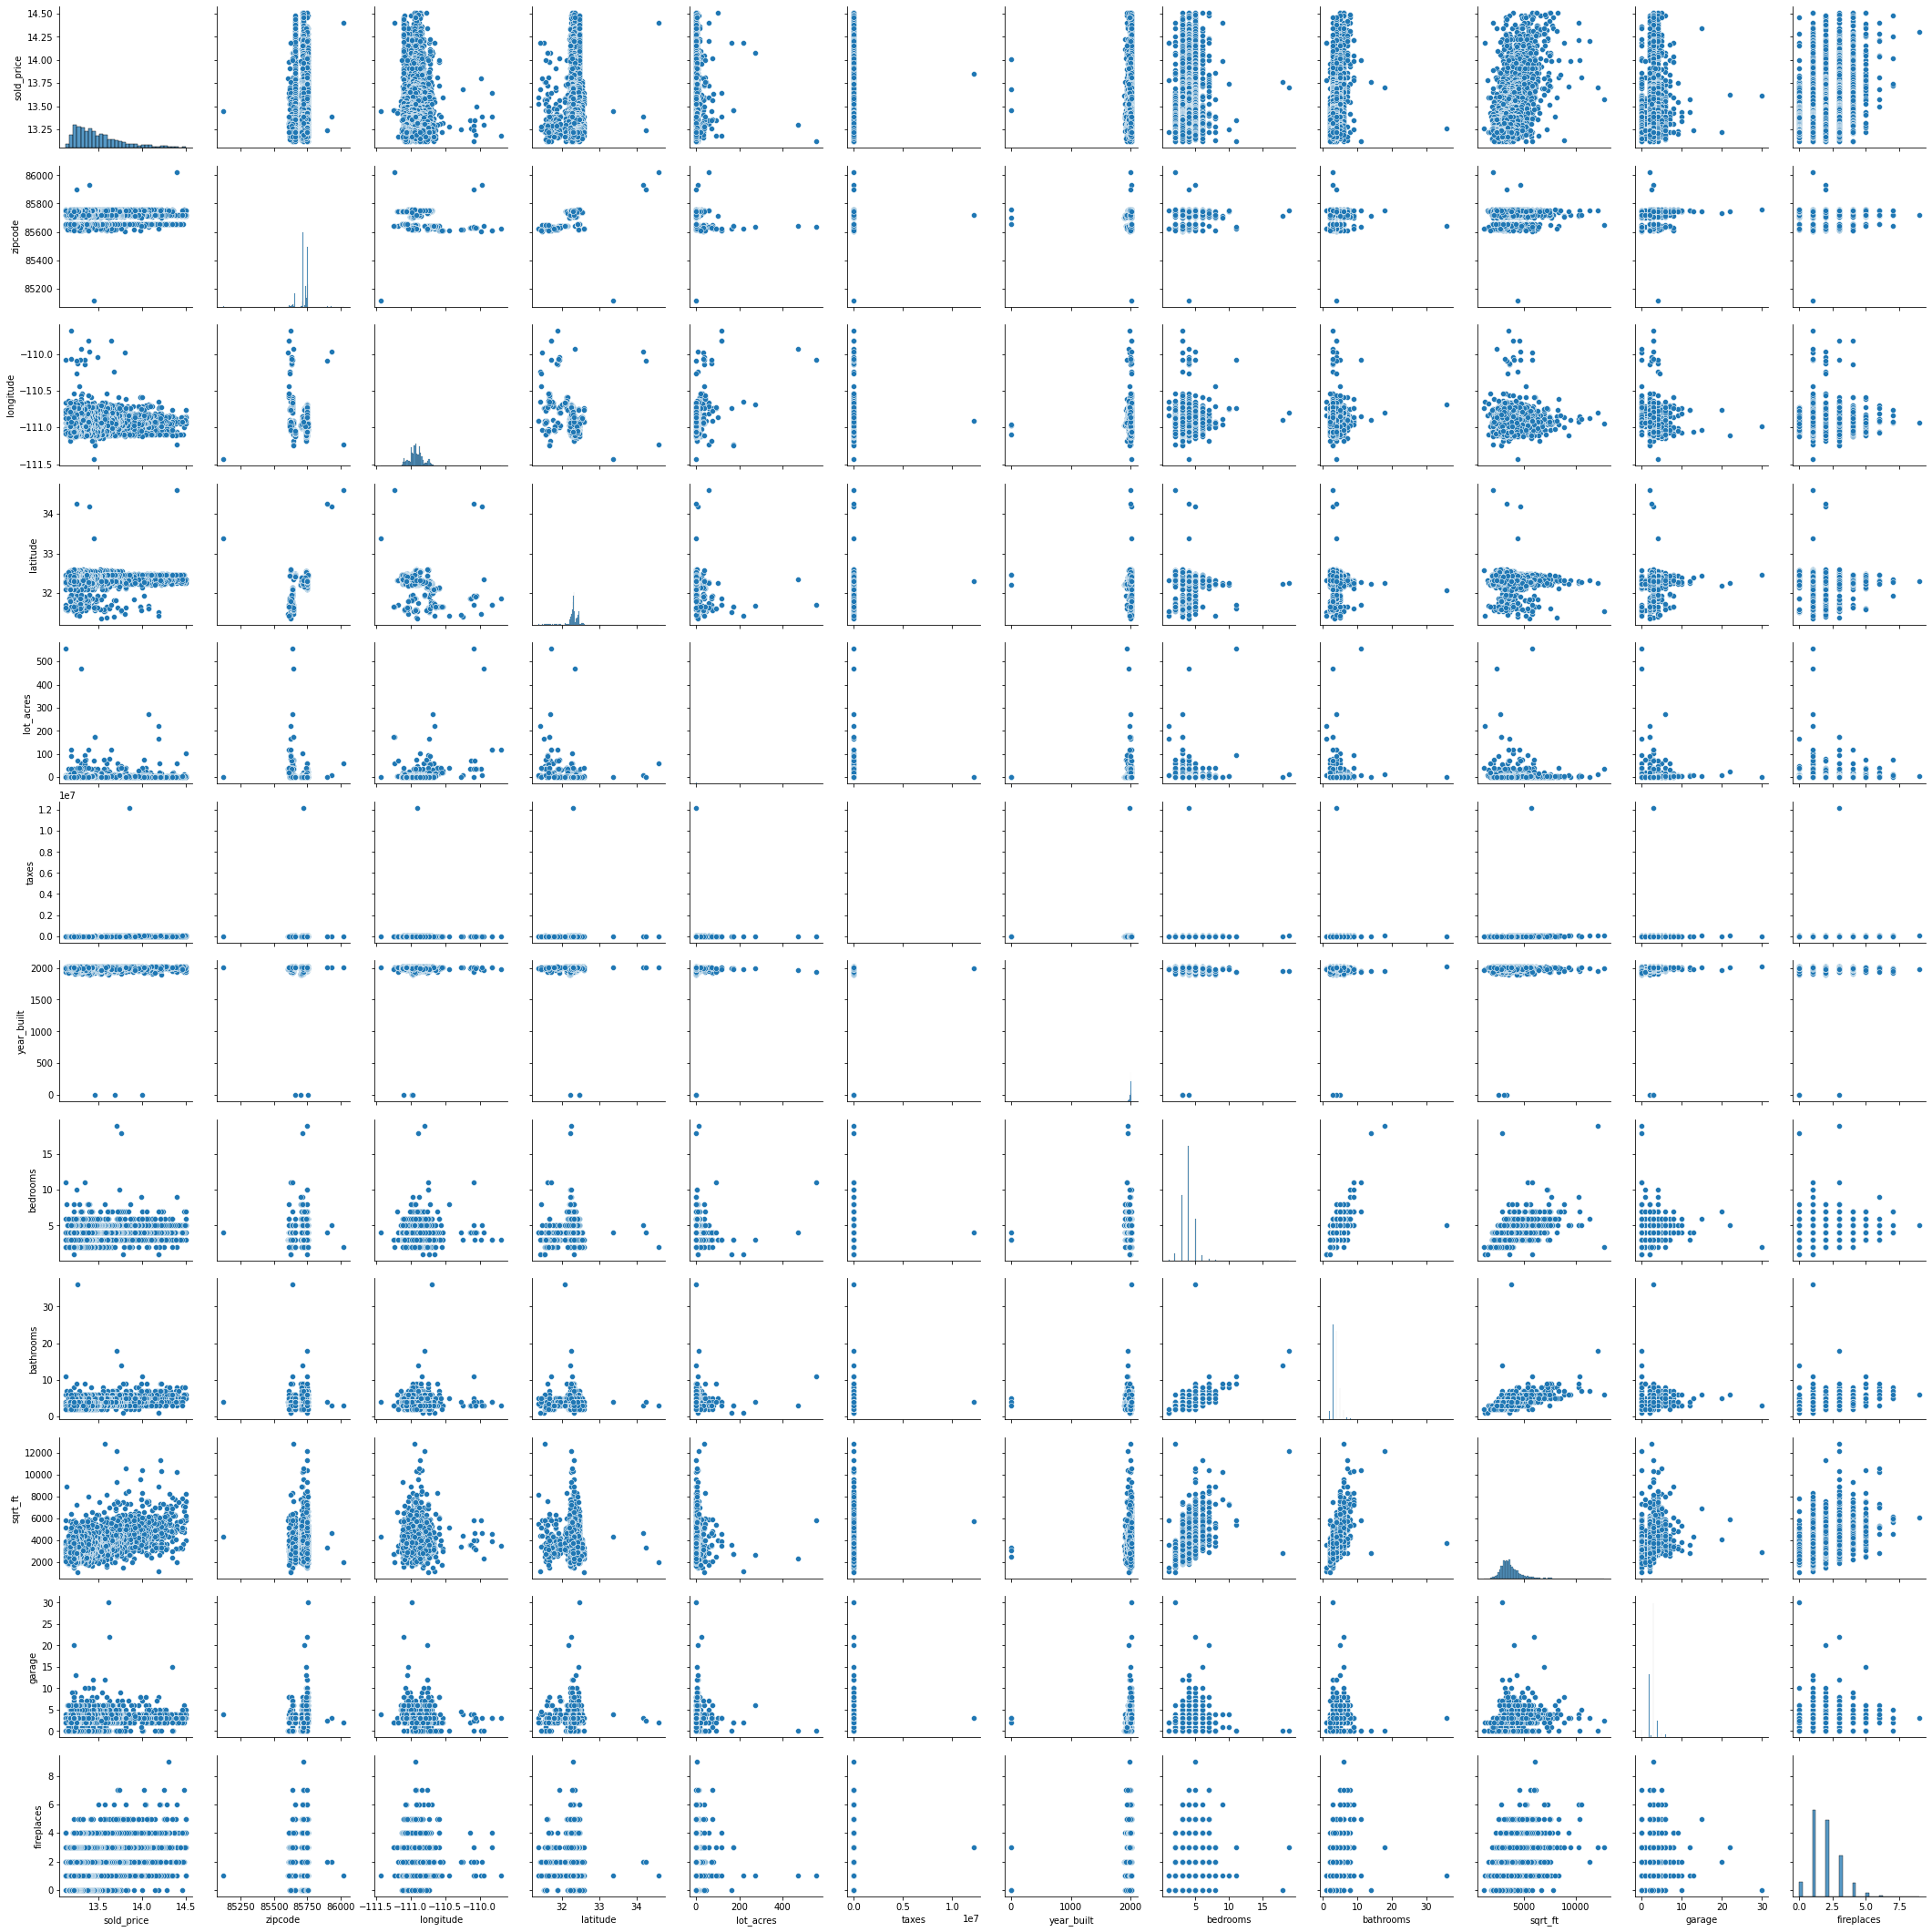

In [68]:
# This line of code is preferred only when you have a small number of features. If you have too many, it´ll take a lot of time to plot (preferred manually).
sns.pairplot(data)

We can also create a heatmap to see the correlation between each feature and the target.

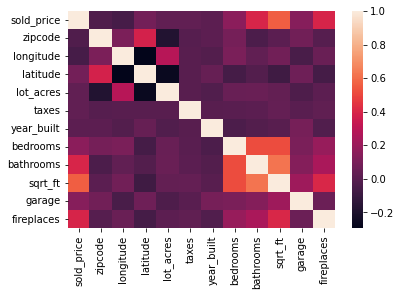

In [69]:
sns.heatmap(data.corr())

In this case, we can see that the most useful features for determining the price of a house are the number of bathrooms and fireplaces, as well as the size of the house in squared feet.

We can see how these three features behave more closely with the price.

In [74]:
fig = px.scatter(data,
                 x = 'bathrooms',
                 y = 'fireplaces',
                 color = 'sold_price',
                 size = 'sqrt_ft',
                 title = 'Sold price based on number of bathrooms and fireplaces')
fig.show()

Of course there's still many features that we ommited from cleaning, which might result in a more obvious distribution of prices. However, we can still observe how we are able to detect the most effective features to determine the price of a house.